In [1]:
#import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeClassifier


#ensemble technique

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv(r"C:\Users\USER\Desktop\AI\LibrariesForAI\SupervisedLearning\9_Logistic_regression_multiclass\breast_cancer_data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [11]:
df.diagnosis= df.diagnosis.map({"M":0,"B":1})

In [12]:
df.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [13]:
X= df.drop(['diagnosis'], axis=1)
y=df['diagnosis']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [15]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
classifier.score(X_train, y_train)

0.9553805774278216

In [17]:
classifier.score(X_test, y_test)

0.9627659574468085

In [18]:
y_pred=classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:

confusion_matrix(y_test,y_pred)

array([[ 63,   4],
       [  3, 118]], dtype=int64)

In [21]:
#SMOTE for data balancing  - Synthetic Minority Over-sampling Technique

In [22]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res,y_res = sm.fit_resample(X_train,y_train)

In [24]:
classifier_res=LogisticRegression()
classifier_res.fit(X_res,y_res) 

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
#before SMOTE
y_train.value_counts()

1    236
0    145
Name: diagnosis, dtype: int64

In [26]:
#After SMOTE

y_res.value_counts()

0    236
1    236
Name: diagnosis, dtype: int64

In [27]:
X_train.shape

(381, 30)

In [28]:
X_res.shape

(472, 30)

In [29]:
y_train.shape

(381,)

In [30]:
y_res.shape

(472,)

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33,random_state=42)
classifier=LogisticRegression()
classifier.fit(X_res,y_res)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
classifier.score(X_res, y_res)

0.9449152542372882

In [33]:
classifier.score(X_train, y_train)

0.9422572178477691

In [34]:
classifier.score(X_test, y_test)

0.9468085106382979

In [35]:

y_pred=classifier_res.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
y_test.value_counts()

1    121
0     67
Name: diagnosis, dtype: int64

In [38]:
confusion_matrix(y_test,y_pred)

array([[ 62,   5],
       [  5, 116]], dtype=int64)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        67
           1       0.96      0.96      0.96       121

    accuracy                           0.95       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



In [40]:
    clf= LogisticRegression()
    clf.fit(X_train, y_train)
    score= clf.score(X_train, y_train)
    print(f"train accuracy for{clf.__class__.__name__} is {score}")
    score= clf.score(X_test, y_test)
    print(f"test accuracy for{clf.__class__.__name__} is {score}")

    print("********************************")

train accuracy forLogisticRegression is 0.9553805774278216
test accuracy forLogisticRegression is 0.9627659574468085
********************************


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
    clf= RandomForestClassifier()
    clf.fit(X_train, y_train)
    score= clf.score(X_train, y_train)
    print(f"train accuracy for{clf.__class__.__name__} is {score}")
    score= clf.score(X_test, y_test)
    print(f"test accuracy for{clf.__class__.__name__} is {score}")

    print("********************************")

train accuracy forRandomForestClassifier is 1.0
test accuracy forRandomForestClassifier is 0.9468085106382979
********************************


In [42]:
clf.feature_importances_

array([0.03423671, 0.01304827, 0.04129405, 0.03607861, 0.00605218,
       0.00352223, 0.05979044, 0.13341438, 0.00340917, 0.00514769,
       0.01250798, 0.00409871, 0.01403464, 0.02100979, 0.00722626,
       0.00279459, 0.00703279, 0.00576491, 0.00536967, 0.00844033,
       0.08351154, 0.01805338, 0.13239763, 0.08718315, 0.00768501,
       0.01368475, 0.07881968, 0.13214926, 0.01577216, 0.00647002])

In [43]:
feature_imp= pd.Series(clf.feature_importances_,index=clf.feature_names_in_).sort_values(ascending=False)

<AxesSubplot:>

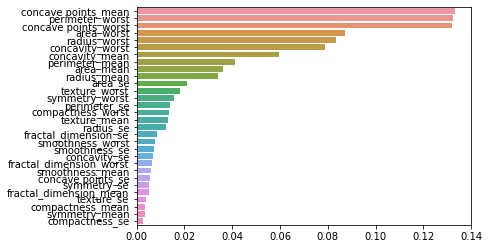

In [44]:
import seaborn as sns
sns.barplot(x=feature_imp,y=feature_imp.index)

In [46]:
    from sklearn.ensemble import AdaBoostClassifier
    clf = AdaBoostClassifier()
    clf.fit(X_train, y_train)
    score= clf.score(X_train, y_train)
    print(f"train accuracy for{clf.__class__.__name__} is {score}")
    score= clf.score(X_test, y_test)
    print(f"test accuracy for{clf.__class__.__name__} is {score}")

    print("********************************")

train accuracy forAdaBoostClassifier is 1.0
test accuracy forAdaBoostClassifier is 0.9521276595744681
********************************


In [49]:
    from sklearn.ensemble import GradientBoostingClassifier
    clf = GradientBoostingClassifier(n_estimators=500,learning_rate=1,max_features=5,random_state=100)
    clf.fit(X_train, y_train)
    score= clf.score(X_train, y_train)
    print(f"train accuracy for{clf.__class__.__name__} is {score}")
    score= clf.score(X_test, y_test)
    print(f"test accuracy for{clf.__class__.__name__} is {score}")

    print("********************************")

train accuracy forGradientBoostingClassifier is 1.0
test accuracy forGradientBoostingClassifier is 0.9840425531914894
********************************
